In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns
uploaded = files.upload()

data =pd.read_csv('Mall_Customers.csv')
print(data.head())

Saving Mall_Customers.csv to Mall_Customers (3).csv
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
print(data.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
if 'CustomerID' in data.columns:
    class_counts = data['CustomerID'].value_counts()
    print("Class counts:")
    print(class_counts)

    class_proportions = data['CustomerID'].value_counts(normalize=True) * 100
    print("\nClass proportions (%):")
    print(class_proportions)
else:
    print("No categorical 'target' column found. Data may not be suitable for balance analysis.")


Class counts:
CustomerID
1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: count, Length: 200, dtype: int64

Class proportions (%):
CustomerID
1      0.5
138    0.5
128    0.5
129    0.5
130    0.5
      ... 
70     0.5
71     0.5
72     0.5
73     0.5
200    0.5
Name: proportion, Length: 200, dtype: float64


In [8]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


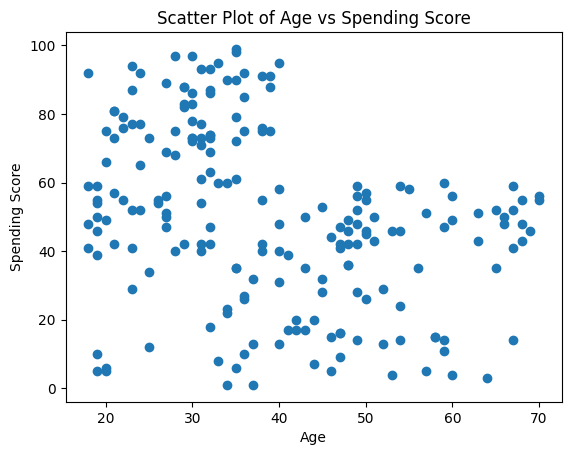

In [20]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Scatter Plot of Age vs Spending Score')
plt.show()

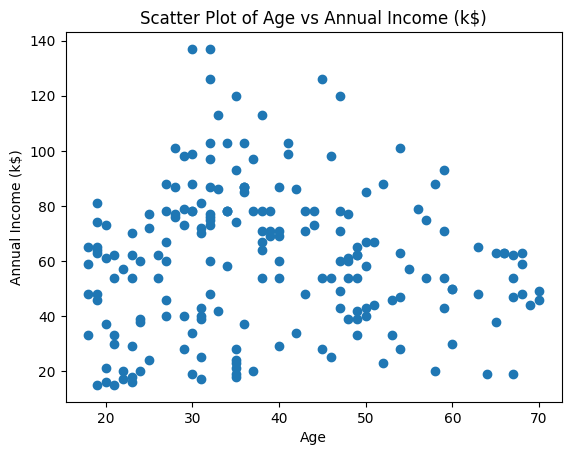

In [24]:
plt.scatter(data['Age'],data['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Scatter Plot of Age vs Annual Income (k$)')
plt.show()

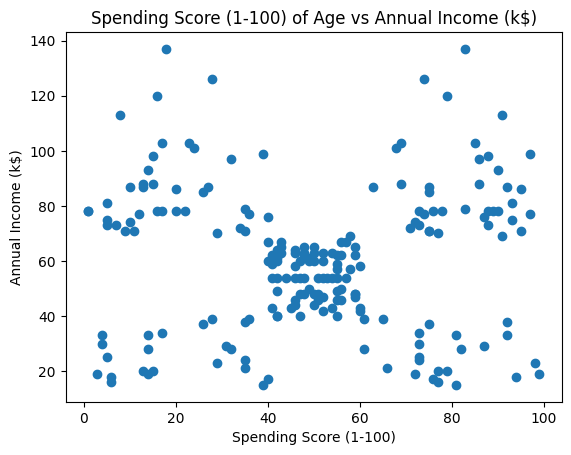

In [25]:
plt.scatter(data['Spending Score (1-100)'],data['Annual Income (k$)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('Spending Score (1-100) of Age vs Annual Income (k$)')
plt.show()

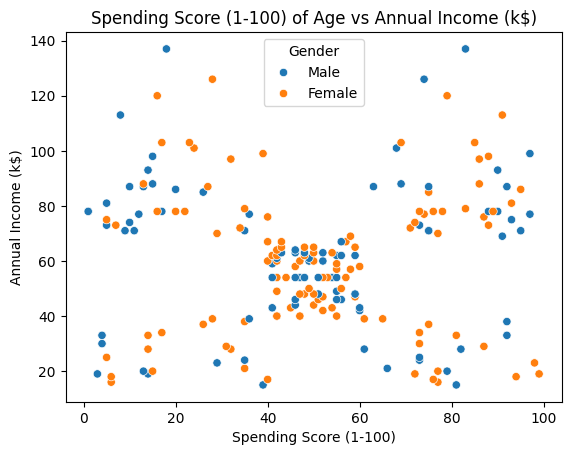

In [31]:
sns.scatterplot(x=data['Spending Score (1-100)'],y=data['Annual Income (k$)'],hue=data['Gender'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('Spending Score (1-100) of Age vs Annual Income (k$)')
plt.show()

In [33]:
relevant_cols = ["Age","Annual Income (k$)",
                 "Spending Score (1-100)"]
customer_data = data[relevant_cols]
customer_data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [37]:
from sklearn.preprocessing import StandardScaler
scaler.fit(customer_data)
scaled_data = scaler.transform(customer_data)
scaled_data


array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [39]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values

In [40]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

In [41]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

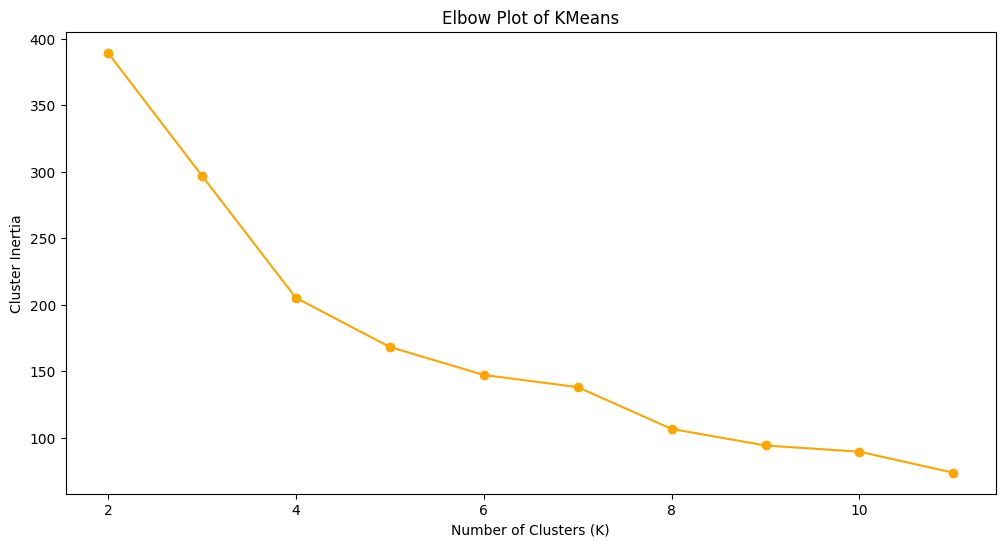

In [42]:
generate_elbow_plot(clusters_centers, k_values)

In [43]:
kmeans_model = KMeans(n_clusters = 5)

In [44]:
kmeans_model.fit(scaled_data)

KMeans(n_clusters=5)

In [45]:
data["clusters"] = kmeans_model.labels_

In [46]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


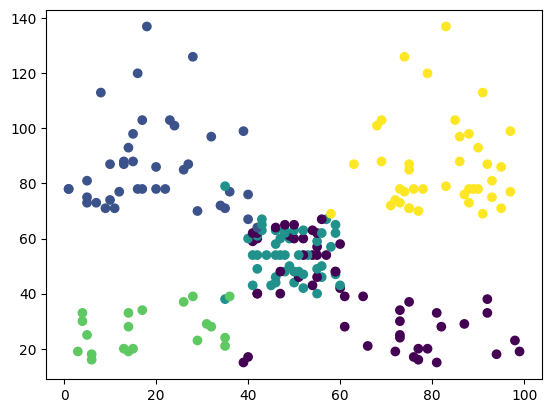

In [47]:
plt.scatter(data["Spending Score (1-100)"],
            data["Annual Income (k$)"],
            c = data["clusters"]
            )